# Demo
Compare the performance of several models 

In [1]:
# load notebook modifiers 
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
# import file 
from train_test import * 

## 0. Load data 

In [1]:
# reading in the data
X, Y = load_preprocess_data()

# sequential split 
X_train_complete, X_test_complete, Y_train, Y_test = \
            train_test_split(X, Y, shuffle=False)

# PCA
pca = PCA(n_components=20)
pca.fit(X_train_complete)
X_train = pca.transform(X_train_complete)
X_test = pca.transform(X_test_complete)

NameError: name 'load_preprocess_data' is not defined

In [4]:
# print the distribution of labels 
pd.Series(Y_train).value_counts(normalize=True)

1.0    0.429929
0.0    0.286192
2.0    0.283879
dtype: float64

## 1. Model Exploration
We mainly compare gradient boosting with XGBoost 

In [5]:
# dump file content
with open(os.path.join(report_path, 'accuracy.txt'), 'w') as f:
    f.write('')

In [6]:
# logistic regression (TOO BAD)
# train_test_lg(X_train, X_test, Y_train, Y_test)

In [7]:
# SVC (TOO BAD)
# train_test_svc(X_train, X_test, Y_train, Y_test)

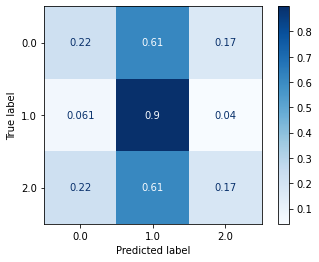

In [8]:
# gradient boosting (DECENT)
train_test_boosting(X_train, X_test, Y_train, Y_test)

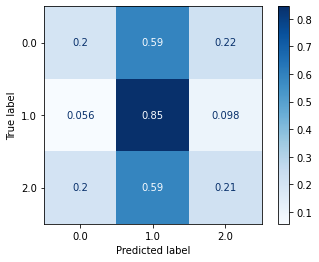

In [9]:
# XGBOOST (DECENT)
train_test_xgb(X_train, X_test, Y_train, Y_test)

## 2. Trading 
The trading rules are outlined in naive_trading.py

The following are currently NOT RUNNABLE

In [3]:
# load file
from naive_trading import * 

In [4]:
# start trading 
# raw_data = load_data()  # from preprocess 
# direction = train_assign_direction(raw_data)  # obtain directions 
# cum_ret, guided_cum_ret = trade(raw_data, direction)  # trade 

# Debug Space 
Test if XGBoost yields different result each time 

In [5]:
# load file
from naive_trading import * 

In [6]:
# load raw file 
raw_data = load_data()  # from preprocess 

Start Loading Data ...
Finish Loading


In [7]:
# extract a random chunk 
offset = 350 * 241 
chunk_start_idx = offset 
chunk_end_idx = offset + (720 + 120) * 241
data_chunk = raw_data.loc[chunk_start_idx:chunk_end_idx - 1, ['c', 'h', 'l', 'v']]
data_chunk

,c,h,l,v
84350,2.235,2.235,2.235,388400.0
84351,2.239,2.240,2.236,680558.0
84352,2.237,2.240,2.237,1642342.0
84353,2.235,2.237,2.235,651900.0
84354,2.236,2.237,2.235,675600.0
...,...,...,...,...
286785,3.003,3.004,3.002,3769300.0
286786,3.003,3.004,3.002,3791100.0
286787,3.003,3.004,3.002,5662500.0
286788,3.001,3.003,3.001,8677000.0


In [12]:
X_train, Y_train, X_test = label_data_and_transform(data_chunk)

In [35]:
direction_curr_period_1 = train_assign_direction_by_period(X_train, Y_train, X_test)

In [28]:
direction_curr_period_2 = train_assign_direction_by_period(X_train, Y_train, X_test)

In [29]:
np.where((direction_curr_period_2 != direction_curr_period_1))

(array([    7,    32,   975,  1453,  1462,  1692,  1696,  1796,  1935,
         1936,  1938,  1939,  2903,  2910,  2923,  3122,  3123,  3370,
         3372,  3375,  3382,  3395,  3413,  3615,  3616,  3622,  4914,
         5050,  5073,  5095,  5096,  5103,  5290,  5305,  5307,  5309,
         5324,  5350,  5471,  5483,  5494,  5520,  5521,  5523,  5524,
         5525,  5612,  5628,  5636,  5664,  5698,  5699,  5715,  5717,
         5725,  5726,  5727,  5740,  5741,  5765,  5775,  5782,  5794,
         5796,  5804,  5805,  5806,  5825,  5826,  5832,  5834,  5866,
         5871,  5904,  5918,  5922,  5956,  5977,  5979,  5994,  6022,
         6027,  6064,  6266,  6269,  6275,  6276,  6741,  6964,  6981,
         6982,  7230,  7236,  7242,  7243,  7244,  7245,  7503,  8921,
         8924,  8925,  8939,  8940,  8942,  9123,  9128,  9146,  9149,
         9150,  9161,  9162,  9163,  9164,  9455,  9623,  9625,  9628,
         9896, 10851, 10858, 10861, 10865, 10867, 10871, 11331, 11333,
      

In [31]:
# test returns 
data_to_trade = data_chunk.loc[direction_curr_period_1.index]
min_ret = data_to_trade.c.pct_change()

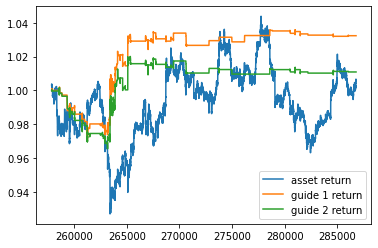

In [34]:
guided_min_ret_1 = min_ret * (direction_curr_period_1 - 1).shift(1)
guided_min_ret_2 = min_ret * (direction_curr_period_2 - 1).shift(1)

cum_ret = (min_ret + 1).cumprod()
guided_cum_ret_1 = (guided_min_ret_1 + 1).cumprod()
guided_cum_ret_2 = (guided_min_ret_2 + 1).cumprod()

plt.plot(cum_ret)
plt.plot(guided_cum_ret_1)
plt.plot(guided_cum_ret_2)
plt.legend(['asset return', 'guide 1 return', 'guide 2 return'])
plt.show()